<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Chicago</font></h1>


## Introduction

In this project, we will convert addresses into their equivalent latitude and longitude values using the Geopy library. Also, we will use the Foursquare API to explore neighborhoods in *Chicago*. We will use the **explore** function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters by using the _k_-means clustering algorithm. 

Finally, we will use the Folium library to visualize the neighborhoods in Chicago and their emerging clusters.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>

2.  <a href="#item2">Explore Neighborhoods in Chicago</a>

3.  <a href="#item3">Analyze Each Neighborhood</a>

4.  <a href="#item4">Cluster Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


Downloading required libraries


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         376 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geograph

<a id='item1'></a>


## 1. Download and Explore Dataset


Neighborhood has a total of 246 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains all the neighborhoods as well as the the latitude and logitude coordinates of each neighborhood.

In [2]:
#installing BeautifulSoup
!pip install BeautifulSoup4
from bs4 import BeautifulSoup 
print('bs4 installed and imported')

     |████████████████████████████████| 122kB 26.2MB/s eta 0:00:01
bs4 installed and imported


In [3]:
# Scraping Wikipedia to get Chicago neighborhood data
req = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago")

#Create a Beautiful Soup Object called Soup
soup = BeautifulSoup(req.content,'xml') 
table = soup.find_all('table')[0]       #table is in xml format

# converting the xml table into a list using the pandas
table_neighborhood = pd.read_html(str(table)) 
table_neighborhood
#type(table_neighborhood)

[                            Neighborhood           Community area
 0                            Albany Park              Albany Park
 1                        Altgeld Gardens                Riverdale
 2                          Andersonville                Edgewater
 3                         Archer Heights           Archer Heights
 4                          Armour Square            Armour Square
 5                                Ashburn                  Ashburn
 6                        Ashburn Estates                  Ashburn
 7                         Auburn Gresham           Auburn Gresham
 8                            Avalon Park              Avalon Park
 9                               Avondale                 Avondale
 10                      Avondale Gardens              Irving Park
 11                     Back of the Yards                 New City
 12                       Belmont Central           Belmont Cragin
 13                       Belmont Gardens                  Her

# Tranform the data into a pandas dataframe
This step will use the scraped list "table_neighborhood" and gps coordinates of each one of its neighborhoods to
create a dataframe that will have 3 columns (neighborhood, latitude & longitude)

In [11]:
# Creating neighborhood dataframe for the parsed table above(neighborhood_df)
neighborhood_df=pd.DataFrame(table_neighborhood[0])
neighborhood_df.head(15)
#neighborhood_df.shape

Neighborhood  Community area
0         Albany Park     Albany Park
1     Altgeld Gardens       Riverdale
2       Andersonville       Edgewater
3      Archer Heights  Archer Heights
4       Armour Square   Armour Square
5             Ashburn         Ashburn
6     Ashburn Estates         Ashburn
7      Auburn Gresham  Auburn Gresham
8         Avalon Park     Avalon Park
9            Avondale        Avondale
10   Avondale Gardens     Irving Park
11  Back of the Yards        New City
12    Belmont Central  Belmont Cragin
13    Belmont Gardens         Hermosa
14    Belmont Heights         Dunning

### Using the Geocoder to get latitude and longitude of each neighborhood

In [6]:
#Installing geocoder
!pip install geocoder==1.5.0
print('geocode installed')

     |████████████████████████████████| 51kB 20.3MB/s eta 0:00:01
geocode installed


In [9]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods_df1 = pd.DataFrame(columns=column_names)
neighborhoods_df1

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude]
Index: []

In [13]:
#import geocoder 
#convert an address into latitude and longitude values
import geocoder

neighborhood_list = neighborhood_df['Neighborhood']
geolocator = Nominatim(user_agent="chicago_explorer")


for neighborhood in neighborhood_list:
    address = neighborhood + ',' + ' Chicago ' + ',' + 'Illinois'
    try:
        location = geolocator.geocode(address)
        #print(location.address)
    except: 
        pass
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
    #print(latitude, longitude)
    neighborhoods_df1 = neighborhoods_df1.append({'Neighborhood': neighborhood,                                          #Neighborhood': neighborhood_df['Neighborhood']
                                                 'Latitude': latitude,
                                                 'Longitude': longitude}, ignore_index=True)
neighborhoods_df1.head()

Neighborhood   Latitude  Longitude
0      Albany Park  41.970329 -87.715992
1  Altgeld Gardens  41.655259 -87.609584
2    Andersonville  41.977139 -87.669273
3   Archer Heights  41.811422 -87.726165
4    Armour Square  41.840231 -87.632986

In [14]:
#checking the neighborhoods_df1 dataframe
print(neighborhoods_df1.shape)
print('The dataframe has {} unique and distinct neighborhoods.'.format(            #Check syntax. .format syntax: {} are replaced by the values generated
        len(neighborhoods_df1['Neighborhood'].unique()),
        ))


(492, 3)
The dataframe has 246 unique and distinct neighborhoods.


#### Create a map of Chicago with neighborhoods superimposed on top


Let's get the geographical coordinates of Chicago

In [15]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago 41.8755616, -87.6244212.


In [16]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, neighborhood in zip(neighborhoods_df1['Latitude'], neighborhoods_df1['Longitude'],neighborhoods_df1['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [17]:
CLIENT_ID = 'T2OKSMPH2BYK2GWAF1SE5H53U1SR3JV5BVV5FBFVHJBFTZQL' # your Foursquare ID
CLIENT_SECRET = 'NQW1WZ1QKNWD1IMMJCVIFNASHGFRCJOF3JFNLR5LGNLDJH5F' # your Foursquare Secret
ACCESS_TOKEN = 'IJ2DGMB3G3H5ZD4BSDHMAJU2E21OT52MZZP0WOC20T0EF1BS'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T2OKSMPH2BYK2GWAF1SE5H53U1SR3JV5BVV5FBFVHJBFTZQL
CLIENT_SECRET:NQW1WZ1QKNWD1IMMJCVIFNASHGFRCJOF3JFNLR5LGNLDJH5F


In [18]:
#check that the url is functional before building a function
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url)
#print('The url is {} and the response the result of the GET request is {}.'.format((url), (results))
results

<Response [200]>

In [19]:
results.headers
#results.headers["Date"]

{'Connection': 'keep-alive', 'Server': 'nginx', 'Content-Type': 'application/json; charset=utf-8', 'Tracer-Time': '275', 'X-RateLimit-Path': '/v2/venues/explore', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Reset': '1625040907', 'X-RateLimit-Remaining': '4999', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000', 'X-Rate-Limit-Key': '52.116.125.104', 'X-ex': 'fastly_cdn', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 30 Jun 2021 07:15:07 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-bwi5036-BWI', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'Vary': 'Accept-Encoding,User-Agent,Accept-Language', 'transfer-encoding': 'chunked'}

## 2. Explore Neighborhoods in Chicago



### Creating a function that returns the venues of all the Chicago neighborhoods


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])        #IT for v in results (v is an element of the results list)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])                  #check syntax
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


#### We will write the code to run the above function on each neighborhood and create a new dataframe called _chicago_venues_.


In [21]:
chicago_venues = getNearbyVenues(names=neighborhoods_df1['Neighborhood'],
                                   latitudes=neighborhoods_df1['Latitude'],
                                   longitudes=neighborhoods_df1['Longitude'])


Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Ashburn Estates
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Heights
Belmont Terrace
Beverly
Beverly View
Beverly Woods
Big Oaks
Northalsted "Boystown"
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cottage Grove Heights
Cragin
Crestline
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Fulton River District
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Gracel

#### Let's check the size of the resulting dataframe


In [22]:
print(chicago_venues.shape)
chicago_venues.head()

(11540, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Albany Park              41.970329              -87.715992   
1  Albany Park              41.970329              -87.715992   
2  Albany Park              41.970329              -87.715992   
3  Albany Park              41.970329              -87.715992   
4  Albany Park              41.970329              -87.715992   

                          Venue  Venue Latitude  Venue Longitude  \
0               Chicago Produce       41.970553       -87.716327   
1    Peking Mandarin Restaurant       41.968292       -87.715783   
2                      T-Mobile       41.968751       -87.713158   
3               Hot Dog Station       41.967880       -87.713404   
4  Great Sea Chinese Restaurant       41.968496       -87.710678   

       Venue Category  
0       Grocery Store  
1  Chinese Restaurant  
2   Mobile Phone Shop  
3       Hot Dog Joint  
4  Chinese Restaurant

Let's check how many venues were returned for each neighborhood

In [17]:
chicago_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                 
Albany Park                                             22   
Altgeld Gardens                                          2   
Andersonville                                           67   
Archer Heights                                          17   
Armour Square                                           11   
Ashburn                                                  9   
Ashburn Estates                                          9   
Auburn Gresham                                           1   
Avalon Park                                             16   
Avondale                                                25   
Avondale Gardens                                        25   
Back of the Yards                                       30   
Belmont Central                                         39   
Belmont Gardens                                         39   
Belmont Heights                                         39   
Belmont Terrace                                         39   
Beverly                                                  9   
Beverly View                                             9   
Beverly Woods                                            8   
Big Oaks                                                 8   
Bowmanville                                             26   
Brainerd                                                 8   
Brickyard                                               44   
Bridgeport                                              42   
Brighton Park                                           17   
Bronzeville                                             18   
Bucktown                                                95   
Budlong Woods                                           20   
Buena Park                                              43   
Burnside                                                 5   
Cabrini–Green                                           30   
Calumet Heights                                          5   
Canaryville                                              9   
Central Station                                         26   
Chatham                                                 20   
Chicago Lawn                                            13   
Chinatown                                               45   
Chrysler Village                                        15   
Clarendon Park                                          31   
Clearing East                                           14   
Clearing West                                           14   
Cottage Grove Heights                                    4   
Cragin                                                  14   
Crestline                                                6   
Dearborn Homes                                           8   
Dearborn Park                                           74   
Douglas Park                                            34   
Dunning                                                  6   
East Beverly                                             9   
East Chatham                                            20   
East Garfield Park                                       7   
East Hyde Park                                          25   
East Pilsen                                             56   
East Side                                                6   
East Village                                            23   
Eden Green                                              20   
Edgebrook                                               22   
Edgewater                                               18   
Edgewater Beach                                         40   
Edgewater Glen                                          35   
Edison Park                                             26   
Englewood                                               15   
Fernwood                                                 7   
Fifth C

#### Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 347 uniques categories.


## 3. Analyze Each Neighborhood


In [24]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  African Restaurant  \
0  Albany Park    0                  0               0                   0   
1  Albany Park    0                  0               0                   0   
2  Albany Park    0                  0               0                   0   
3  Albany Park    0                  0               0                   0   
4  Albany Park    0                  0               0                   0   

   Airport  Airport Service  American Restaurant  Amphitheater  \
0        0                0                    0             0   
1        0                0                    0             0   
2        0                0                    0             0   
3        0                0                    0             0   
4        0                0                    0             0   

   Animal Shelter  Antique Shop  Arcade  Arepa Restaurant  \
0               0             0       0                 0   
1               0             0       0                 0   
2               0             0       0                 0   
3               0             0       0                 0   
4               0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                0            0              0                0          0   
1                0            0              0                0          0   
2                0            0              0                0          0   
3                0            0              0                0          0   
4                0            0              0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0      0                0         0            0   
1                 0      0                0         0            0   
2                 0      0                0         0            0   
3                 0      0                0         0            0   
4                 0      0                0         0            0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bistro  \
0           0              0                         0          0       0   
1           0              0                         0          0       0   
2           0              0                         0          0       0   
3           0              0                         0          0       0   
4           0              0                         0          0       0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  Boxing Gym  \
0           0              0          0         0              0         

And let's examine the new dataframe size.


<a id='item2'></a>


In [25]:
chicago_onehot.shape

(11540, 348)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [26]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

Neighborhood       ATM  Accessories Store  \
0                            Albany Park  0.000000           0.045455   
1                        Altgeld Gardens  0.000000           0.000000   
2                          Andersonville  0.000000           0.000000   
3                         Archer Heights  0.000000           0.000000   
4                          Armour Square  0.000000           0.000000   
5                                Ashburn  0.000000           0.000000   
6                        Ashburn Estates  0.000000           0.000000   
7                         Auburn Gresham  0.000000           0.000000   
8                            Avalon Park  0.058824           0.000000   
9                               Avondale  0.000000           0.000000   
10                      Avondale Gardens  0.000000           0.000000   
11                     Back of the Yards  0.000000           0.000000   
12                       Belmont Central  0.000000           0.000000   
13                       Belmont Gardens  0.000000           0.000000   
14                       Belmont Heights  0.000000           0.000000   
15                       Belmont Terrace  0.000000           0.000000   
16                               Beverly  0.000000           0.000000   
17                          Beverly View  0.000000           0.000000   
18                         Beverly Woods  0.000000           0.000000   
19                              Big Oaks  0.000000           0.000000   
20                           Bowmanville  0.000000           0.000000   
21                              Brainerd  0.000000           0.000000   
22                             Brickyard  0.000000           0.023810   
23                            Bridgeport  0.000000           0.000000   
24                         Brighton Park  0.000000           0.000000   
25                           Bronzeville  0.000000           0.000000   
26                              Bucktown  0.000000           0.011111   
27                         Budlong Woods  0.000000           0.000000   
28                            Buena Park  0.000000           0.000000   
29                              Burnside  0.000000           0.000000   
30                         Cabrini–Green  0.000000           0.000000   
31                       Calumet Heights  0.000000           0.000000   
32                           Canaryville  0.000000           0.000000   
33                       Central Station  0.000000           0.000000   
34                               Chatham  0.000000           0.000000   
35                          Chicago Lawn  0.000000           0.000000   
36                             Chinatown  0.000000           0.000000   
37                      Chrysler Village  0.000000           0.000000   
38                        Clarendon Park  0.000000           0.000000   
39                         Clearing East  0.000000           0.000000   
40                         Clearing West  0.000000           0.000000   
41                 Cottage Grove Heights  0.000000           0.000000   
42                                Cragin  0.000000           0.000000   
43                             Crestline  0.000000           0.000000   
44                        Dearborn Homes  0.000000           0.000000   
45                         Dearborn Park  0.000000           0.000000   
46                          Douglas Park  0.000000           0.000000   
47                               Dunning  0.000000           0.000000   
48                          East Beverly  0.000000           0.000000   
49                          East Chatham  0.000000           0.000000   
50                    East Garfield Park  0.000000           0.000000   
51                        East Hyde Park  0.000000           0.000000   
52                           East Pilsen  0.000000           0.000000   
53                             East Side  0.000000           0.000000   
54           

#### Let's confirm the new size

In [27]:
chicago_grouped.shape

(244, 348)

#### Let's print each neighborhood along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                       venue  freq
0              Grocery Store  0.14
1         Mexican Restaurant  0.09
2         Chinese Restaurant  0.09
3  Latin American Restaurant  0.05
4                       Park  0.05


----Altgeld Gardens----
                           venue  freq
0                  Grocery Store   0.5
1                           Park   0.5
2                         Museum   0.0
3                        Parking   0.0
4  Paper / Office Supplies Store   0.0


----Andersonville----
            venue  freq
0       Pet Store  0.04
1       Gift Shop  0.03
2  Sandwich Place  0.03
3       Bookstore  0.03
4        Beer Bar  0.03


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.16
1   Mobile Phone Shop  0.11
2       Grocery Store  0.11
3  Italian Restaurant  0.05
4    Video Game Store  0.05


----Armour Square----
                venue  freq
0  Chinese Restaurant  0.27
1    Business Service  0.09
2       Hot Dog Joint  0.09
3      Sandwi

#### Let's put that into a _pandas_ dataframe

In [29]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      Albany Park         Grocery Store    Mexican Restaurant   
1  Altgeld Gardens                  Park         Grocery Store   
2    Andersonville             Pet Store    Salon / Barbershop   
3   Archer Heights    Mexican Restaurant     Mobile Phone Shop   
4    Armour Square    Chinese Restaurant      Business Service   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Chinese Restaurant         Hot Dog Joint     Mobile Phone Shop   
1     Electronics Store    English Restaurant           Escape Room   
2             Gift Shop            Comic Shop        Sandwich Place   
3         Grocery Store                  Bank        Sandwich Place   
4        Ice Cream Shop         Hot Dog Joint        Sandwich Place   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0           Bus Station           Sushi Restaurant   Fried Chicken Joint   
1  Ethiopian Restaurant              Event Service           Event Space   
2  Gym / Fitness Center  Middle Eastern Restaurant    Italian Restaurant   
3           Gas Station                Coffee Shop           Candy Store   
4    Italian Restaurant                Gas Station         Grocery Store   

  9th Most Common Venue  10th Most Common Venue  
0        Sandwich Place  Thrift / Vintage Store  
1               Exhibit              Eye Doctor  
2                Lounge                Beer Bar  
3  Gym / Fitness Center           Big Box Store  
4      Asian Restaurant      English Restaurant

## 4. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

<a id='item3'></a>


In [31]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
#keep to replicate same clusters array([1, 0, 1, 1, 1, 1, 1, 3, 1, 1]

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [27]:
#chicago_merged.drop(['Cluster Labels','Cluster Labels1'], axis=1)

In [28]:
#chicago_merged

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


chicago_merged = neighborhoods_df1

#merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')

chicago_merged.head() # check the last columns!

Neighborhood   Latitude  Longitude  Cluster Labels  \
0        Albany Park  41.970329 -87.715992               2   
246      Albany Park  41.970329 -87.715992               2   
1    Altgeld Gardens  41.655259 -87.609584               4   
247  Altgeld Gardens  41.655259 -87.609584               4   
2      Andersonville  41.977139 -87.669273               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Grocery Store    Mexican Restaurant    Chinese Restaurant   
246         Grocery Store    Mexican Restaurant    Chinese Restaurant   
1                    Park         Grocery Store     Electronics Store   
247                  Park         Grocery Store     Electronics Store   
2               Pet Store    Salon / Barbershop             Gift Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Hot Dog Joint     Mobile Phone Shop           Bus Station   
246         Hot Dog Joint     Mobile Phone Shop           Bus Station   
1      English Restaurant           Escape Room  Ethiopian Restaurant   
247    English Restaurant           Escape Room  Ethiopian Restaurant   
2              Comic Shop        Sandwich Place  Gym / Fitness Center   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Sushi Restaurant   Fried Chicken Joint        Sandwich Place   
246           Sushi Restaurant   Fried Chicken Joint        Sandwich Place   
1                Event Service           Event Space               Exhibit   
247              Event Service           Event Space               Exhibit   
2    Middle Eastern Restaurant    Italian Restaurant                Lounge   

     10th Most Common Venue  
0    Thrift / Vintage Store  
246  Thrift / Vintage Store  
1                Eye Doctor  
247              Eye Doctor  
2                  Beer Bar

In [30]:
#drop cluster labels when needed
#chicago_merged.drop(['Cluster Labels','Cluster Labels1'], axis=1)

Finally, let's visualize the resulting clusters

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. 

#### Cluster 1

In [34]:
cluster1 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(3, chicago_merged.shape[1]))]]
cluster1

Neighborhood  Cluster Labels 1st Most Common Venue  \
44                Crestline               0     Convenience Store   
290               Crestline               0     Convenience Store   
48                  Dunning               0             Multiplex   
294                 Dunning               0             Multiplex   
84            Hamilton Park               0           Auto Garage   
330           Hamilton Park               0           Auto Garage   
98   Jackson Park Highlands               0            Donut Shop   
344  Jackson Park Highlands               0            Donut Shop   
187                Roseland               0        Sandwich Place   
433                Roseland               0        Sandwich Place   

    2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
44         Sandwich Place                   Donut Shop    Seafood Restaurant   
290        Sandwich Place                   Donut Shop    Seafood Restaurant   
48         Sandwich Place           Seafood Restaurant     Convenience Store   
294        Sandwich Place           Seafood Restaurant     Convenience Store   
84         Sandwich Place               Clothing Store           Zoo Exhibit   
330        Sandwich Place               Clothing Store           Zoo Exhibit   
98            Zoo Exhibit            Electronics Store           Escape Room   
344           Zoo Exhibit            Electronics Store           Escape Room   
187           Zoo Exhibit  Eastern European Restaurant    English Restaurant   
433           Zoo Exhibit  Eastern European Restaurant    English Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
44    Filipino Restaurant           Event Space           Fish Market   
290   Filipino Restaurant           Event Space           Fish Market   
48      Fish & Chips Shop               Exhibit           Flower Shop   
294     Fish & Chips Shop               Exhibit           Flower Shop   
84            Fabric Shop           Escape Room  Ethiopian Restaurant   
330           Fabric Shop           Escape Room  Ethiopian Restaurant   
98   Ethiopian Restaurant         Event Service           Event Space   
344  Ethiopian Restaurant         Event Service           Event Space   
187           Escape Room  Ethiopian Restaurant         Event Service   
433           Escape Room  Ethiopian Restaurant         Event Service   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
44      Electronics Store     Fish & Chips Shop     English Restaurant  
290     Electronics Store     Fish & Chips Shop     English Restaurant  
48     English Restaurant           Fish Market            Escape Room  
294    English Restaurant           Fish Market            Escape Room  
84          Event Service           Event Space                Exhibit  
330         Event Service           Event Space                Exhibit  
98                Exhibit            Eye Doctor            Fabric Shop  
344               Exhibit            Eye Doctor            Fabric Shop  
187           Event Space               Exhibit             Eye Doctor  
433           Event Space               Exhibit             Eye Doctor

In [38]:
columns = cluster1.columns[2:12]
columns

Index(['1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [282]:
#Creating a dictionnary list from cluster 1

#initialize the list
cluster1_dict_list = []
for venue in columns:
    
    cluster1_dict = cluster1[venue].value_counts().to_dict()     #convert each data series into a dictionnary
    print(cluster1_dict)
    cluster1_dict_list.append(cluster1_dict)                    # merge dictionnries to create list
print('=====')
print(cluster1_dict_list)

{'Park': 18, 'Sandwich Place': 2, 'Grocery Store': 2, 'Donut Shop': 1, 'Bus Station': 1, 'Historic Site': 1, 'Liquor Store': 1, 'Cosmetics Shop': 1, 'Theater': 1, 'History Museum': 1, 'Light Rail Station': 1, 'Motel': 1}
{'Park': 10, 'Asian Restaurant': 3, 'Bus Station': 3, 'Dog Run': 3, 'Food': 2, 'Skating Rink': 2, 'Football Stadium': 1, 'Indian Restaurant': 1, 'Shoe Store': 1, 'Track': 1, 'Liquor Store': 1, 'Insurance Office': 1, 'Gym / Fitness Center': 1, 'Lounge': 1}
{'Campground': 3, 'Clothing Store': 3, 'Fast Food Restaurant': 2, 'Breakfast Spot': 2, 'Coffee Shop': 2, 'Eastern European Restaurant': 2, 'Food Court': 2, 'Park': 1, 'Dog Run': 1, 'Baseball Field': 1, 'Athletics & Sports': 1, 'Public Art': 1, 'Home Service': 1, 'Asian Restaurant': 1, 'Garden': 1, 'Playground': 1, 'BBQ Joint': 1, 'Deli / Bodega': 1, 'Sandwich Place': 1, 'Intersection': 1, 'Bus Station': 1, 'Zoo Exhibit': 1}
{'Zoo Exhibit': 7, 'Diner': 3, 'Light Rail Station': 2, 'Museum': 2, 'English Restaurant': 2, '

In [283]:
#Combining all the dictionnaries and summing up values of duplicates keys

import itertools
import collections

Cdict_1 = collections.defaultdict(int)

cluster1_dict_list_items = []
for i in range(10):
    cluster1_dict_list_items.append(cluster1_dict_list[i].items())
    
#print(cluster1_dict_list_items)


for k, v in itertools.chain(cluster1_dict_list_items[0], cluster1_dict_list_items[1], 
                            cluster1_dict_list_items[2], cluster1_dict_list_items[3], 
                            cluster1_dict_list_items[4], cluster1_dict_list_items[5], 
                            cluster1_dict_list_items[6], cluster1_dict_list_items[7], 
                            cluster1_dict_list_items[8], cluster1_dict_list_items[9]):          
    Cdict_1[k] += v

print(dict(Cdict_1))


{'Park': 31, 'Sandwich Place': 5, 'Grocery Store': 2, 'Donut Shop': 1, 'Bus Station': 6, 'Historic Site': 1, 'Liquor Store': 2, 'Cosmetics Shop': 1, 'Theater': 1, 'History Museum': 1, 'Light Rail Station': 3, 'Motel': 1, 'Asian Restaurant': 4, 'Dog Run': 4, 'Food': 3, 'Skating Rink': 2, 'Football Stadium': 1, 'Indian Restaurant': 1, 'Shoe Store': 1, 'Track': 1, 'Insurance Office': 1, 'Gym / Fitness Center': 2, 'Lounge': 1, 'Campground': 3, 'Clothing Store': 4, 'Fast Food Restaurant': 6, 'Breakfast Spot': 2, 'Coffee Shop': 2, 'Eastern European Restaurant': 5, 'Food Court': 2, 'Baseball Field': 1, 'Athletics & Sports': 1, 'Public Art': 1, 'Home Service': 1, 'Garden': 1, 'Playground': 1, 'BBQ Joint': 1, 'Deli / Bodega': 1, 'Intersection': 2, 'Zoo Exhibit': 19, 'Diner': 3, 'Museum': 2, 'English Restaurant': 13, 'Mexican Restaurant': 2, 'Vineyard': 1, 'Soccer Field': 1, 'Pharmacy': 1, 'Lawyer': 1, 'Farm': 2, 'Nature Preserve': 1, 'American Restaurant': 1, 'Falafel Restaurant': 13, 'Escape R

In [291]:
#converting the Cdict dictionnary to a dataframe and generating a bar graph

cluster1_df = pd.DataFrame(list(Cdict_1.items()), columns =['venue', 'count'])

cluster1_df.sort_values(by=['count'], ascending=False, inplace=True)
cluster1_df.set_index("venue", drop=True, inplace=True)

cluster1_df = cluster1_df[cluster1_df['count'] > 2] 
cluster1_df

count
venue                             
Park                            31
Ethiopian Restaurant            29
Escape Room                     27
Event Space                     22
Zoo Exhibit                     19
Eye Doctor                      17
Fabric Shop                     13
Falafel Restaurant              13
English Restaurant              13
Electronics Store                7
Fast Food Restaurant             6
Factory                          6
Bus Station                      6
Eastern European Restaurant      5
Sandwich Place                   5
Asian Restaurant                 4
Dog Run                          4
Clothing Store                   4
Train Station                    3
Diner                            3
Campground                       3
Light Rail Station               3
Food                             3

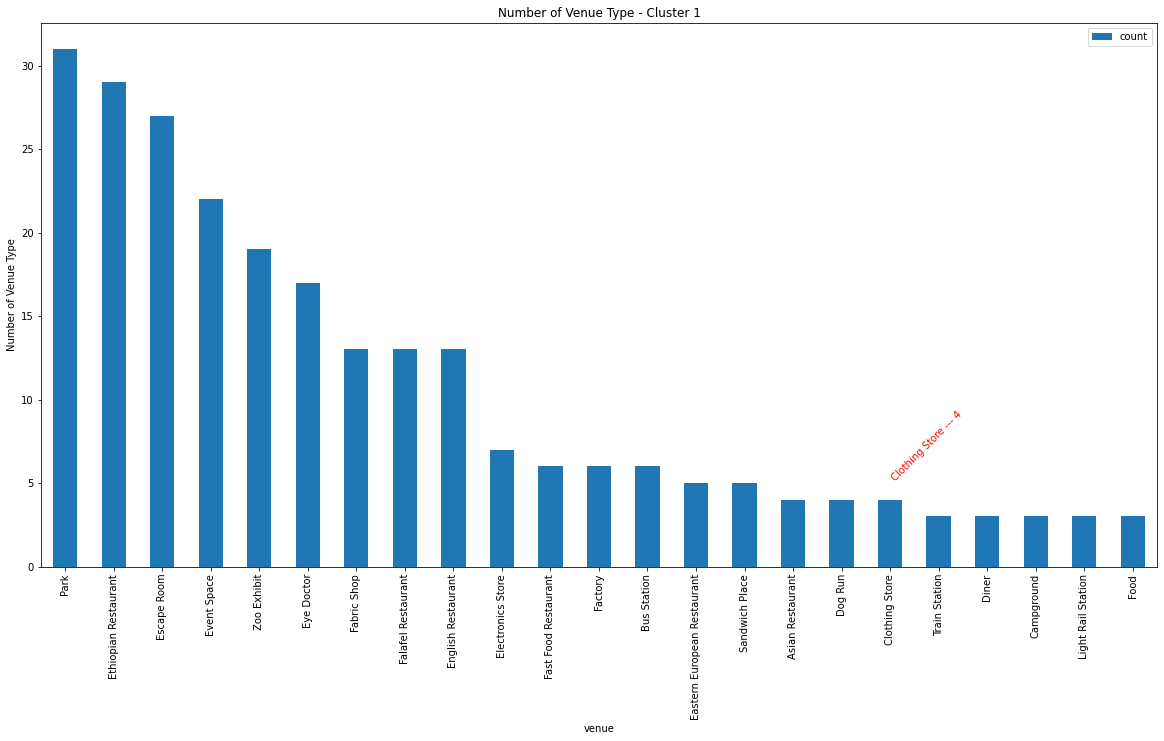

In [293]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cluster1_df.plot(kind ='bar', figsize = (20, 10))
plt.title('Number of Venue Type - Cluster 1')
plt.xlabel('venue')
plt.ylabel('Number of Venue Type')

#plt.annotate('',                    
 #            xy=(20, 15),            
 #            xytext=(17, 4),        
#             xycoords='data',        
#           arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('Clothing Store --- 4', 
             xy=(17, 5),                    
             rotation=45,                  
             va='bottom',                    
             ha='left', 
             color ='red'
            )

plt.show()

#### Cluster 2

In [210]:
cluster2 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[0] + list(range(3, chicago_merged.shape[1]))]]


In [137]:
#Creating a dictionnary list from cluster 2

#initialize the list
cluster2_dict_list = []
for venue in columns:
    
    cluster2_dict = cluster2[venue].value_counts().to_dict()     #convert each data series into a dictionnary
    print(cluster2_dict)
    cluster2_dict_list.append(cluster2_dict)                    # merge dictionnries to create list
print('=====')
print(cluster2_dict_list)

{'Mexican Restaurant': 20, 'Sandwich Place': 19, 'Coffee Shop': 14, 'Cosmetics Shop': 12, 'Pizza Place': 9, 'Fast Food Restaurant': 9, 'Chinese Restaurant': 8, 'Bar': 6, 'Grocery Store': 5, 'Italian Restaurant': 5, 'Ice Cream Shop': 4, 'Bus Station': 4, 'Hotel': 4, 'Japanese Restaurant': 4, 'Food Truck': 3, 'Construction & Landscaping': 3, 'American Restaurant': 3, 'Convenience Store': 3, 'Furniture / Home Store': 2, 'Gym / Fitness Center': 2, 'Business Service': 2, 'Restaurant': 2, 'Park': 2, 'Soccer Field': 2, 'Dive Bar': 2, 'Baseball Stadium': 2, 'Playground': 2, 'ATM': 2, 'Liquor Store': 2, 'Food': 2, 'Seafood Restaurant': 2, 'Harbor / Marina': 2, 'Caribbean Restaurant': 2, 'Deli / Bodega': 2, 'Train Station': 1, 'Eastern European Restaurant': 1, 'Diner': 1, 'Martial Arts School': 1, 'Discount Store': 1, 'Juice Bar': 1, 'Bakery': 1, 'Thai Restaurant': 1, 'History Museum': 1, 'Zoo Exhibit': 1, 'Fried Chicken Joint': 1, 'Dry Cleaner': 1, 'Bowling Alley': 1, 'Optical Shop': 1, 'Yoga S

In [141]:
#Combining all the dictionnaries and summing up values of duplicates keys

import itertools
import collections

Cdict_2 = collections.defaultdict(int)

cluster2_dict_list_items = []
for i in range(10):
    cluster2_dict_list_items.append(cluster2_dict_list[i].items())
    
#print(cluster1_dict_list_items)


for k, v in itertools.chain(cluster2_dict_list_items[0], cluster2_dict_list_items[1], 
                            cluster2_dict_list_items[2], cluster2_dict_list_items[3], 
                            cluster2_dict_list_items[4], cluster2_dict_list_items[5], 
                            cluster2_dict_list_items[6], cluster2_dict_list_items[7], 
                            cluster2_dict_list_items[8], cluster2_dict_list_items[9]):          
    Cdict_2[k] += v

print(dict(Cdict_2))


{'Mexican Restaurant': 61, 'Sandwich Place': 87, 'Coffee Shop': 59, 'Cosmetics Shop': 21, 'Pizza Place': 66, 'Fast Food Restaurant': 39, 'Chinese Restaurant': 40, 'Bar': 53, 'Grocery Store': 53, 'Italian Restaurant': 28, 'Ice Cream Shop': 12, 'Bus Station': 39, 'Hotel': 11, 'Japanese Restaurant': 10, 'Food Truck': 8, 'Construction & Landscaping': 6, 'American Restaurant': 27, 'Convenience Store': 25, 'Furniture / Home Store': 9, 'Gym / Fitness Center': 17, 'Business Service': 8, 'Restaurant': 16, 'Park': 55, 'Soccer Field': 5, 'Dive Bar': 13, 'Baseball Stadium': 4, 'Playground': 7, 'ATM': 4, 'Liquor Store': 24, 'Food': 14, 'Seafood Restaurant': 28, 'Harbor / Marina': 4, 'Caribbean Restaurant': 8, 'Deli / Bodega': 8, 'Train Station': 25, 'Eastern European Restaurant': 6, 'Diner': 17, 'Martial Arts School': 10, 'Discount Store': 38, 'Juice Bar': 2, 'Bakery': 31, 'Thai Restaurant': 17, 'History Museum': 5, 'Zoo Exhibit': 20, 'Fried Chicken Joint': 25, 'Dry Cleaner': 2, 'Bowling Alley': 3,

In [273]:
#converting the Cdict dictionnary to a dataframe and generating a bar graph

cluster2_df = pd.DataFrame(list(Cdict_2.items()), columns =['venue', 'count'])

cluster2_df.sort_values(by=['count'], ascending=False, inplace=True)
cluster2_df = cluster2_df[ (cluster2_df['count'] < 25) & (cluster2_df['count'] > 14) ] 
cluster2_df.set_index("venue", drop=True, inplace=True)
cluster2_df


count
venue                      
Liquor Store             24
Mobile Phone Shop        24
Bank                     23
Pharmacy                 22
Breakfast Spot           21
Cosmetics Shop           21
Event Space              20
Zoo Exhibit              20
Video Store              18
Sushi Restaurant         18
Diner                    17
Taco Place               17
Gym / Fitness Center     17
Lounge                   17
Thai Restaurant          17
Restaurant               16
Clothing Store           15
Boutique                 15
English Restaurant       15

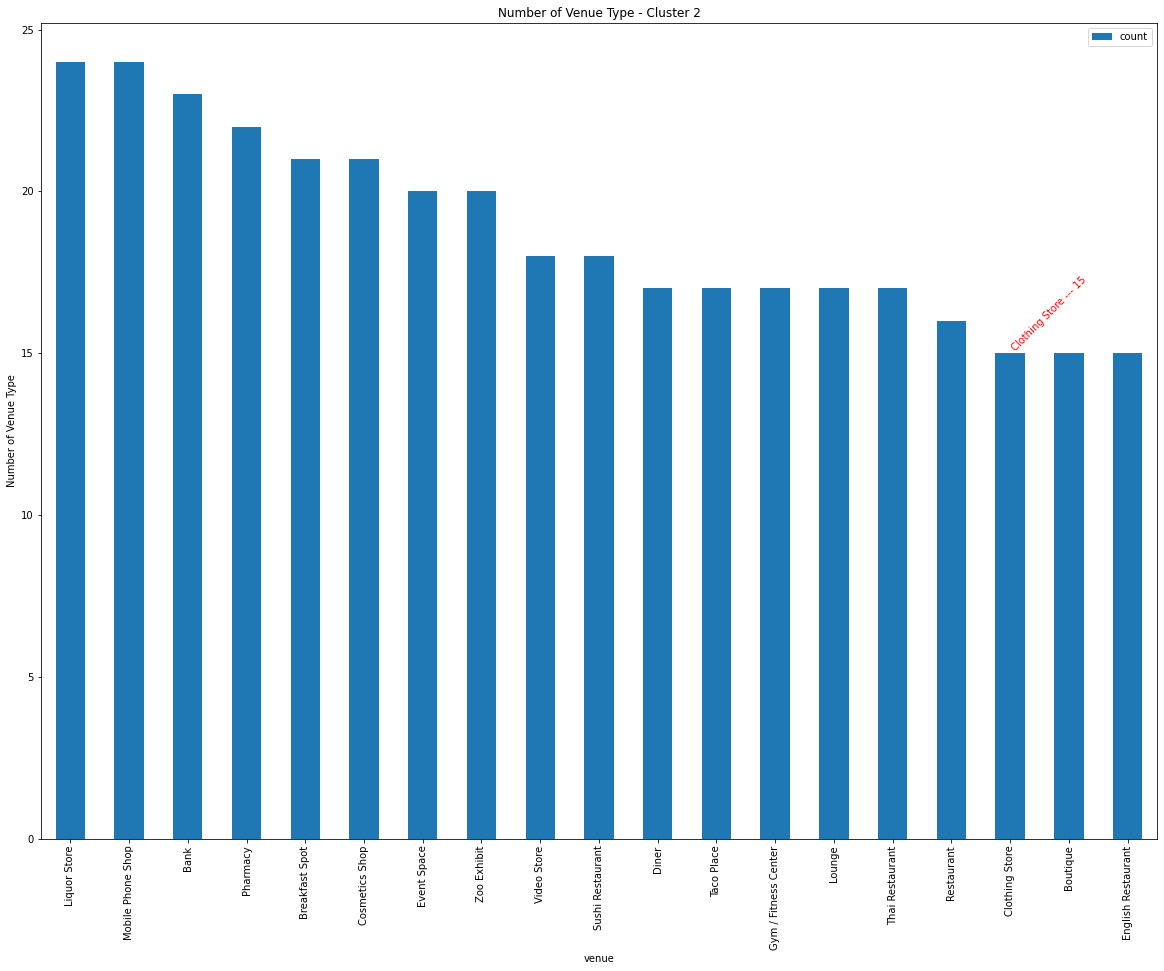

In [297]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cluster2_df.plot(kind ='bar', figsize = (20, 15))
plt.title('Number of Venue Type - Cluster 2')
plt.xlabel('venue')
plt.ylabel('Number of Venue Type')

plt.annotate('',                    
             xy=(10, 10),            
             xytext=(10, 10),        
             xycoords='data',        
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('Clothing Store --- 15', 
             xy=(16,15),                    
             rotation=45,                  
             va='bottom',                    
             ha='left', 
             color = 'red'
            )

plt.show()

#### Cluster 3

In [214]:
cluster3 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[0] + list(range(3, chicago_merged.shape[1]))]]

In [215]:
#Creating a dictionnary list from cluster 3

#initialize the list
cluster3_dict_list = []
for venue in columns:
    
    cluster3_dict = cluster3[venue].value_counts().to_dict()     #convert each data series into a dictionnary
    print(cluster3_dict)
    cluster3_dict_list.append(cluster3_dict)                    # merge dictionnries to create list
print('=====')
print(cluster3_dict_list)

{'Home Service': 1}
{'Zoo Exhibit': 1}
{'Farm': 1}
{'English Restaurant': 1}
{'Escape Room': 1}
{'Ethiopian Restaurant': 1}
{'Event Space': 1}
{'Eye Doctor': 1}
{'Fabric Shop': 1}
{'Factory': 1}
=====
[{'Home Service': 1}, {'Zoo Exhibit': 1}, {'Farm': 1}, {'English Restaurant': 1}, {'Escape Room': 1}, {'Ethiopian Restaurant': 1}, {'Event Space': 1}, {'Eye Doctor': 1}, {'Fabric Shop': 1}, {'Factory': 1}]


In [216]:
#Combining all the dictionnaries and summing up values of duplicates keys

import itertools
import collections

Cdict_3 = collections.defaultdict(int)

cluster3_dict_list_items = []
for i in range(10):
    cluster3_dict_list_items.append(cluster3_dict_list[i].items())
    
#print(cluster1_dict_list_items)


for k, v in itertools.chain(cluster3_dict_list_items[0], cluster3_dict_list_items[1], 
                            cluster3_dict_list_items[2], cluster3_dict_list_items[3], 
                            cluster3_dict_list_items[4], cluster3_dict_list_items[5], 
                            cluster3_dict_list_items[6], cluster3_dict_list_items[7], 
                            cluster3_dict_list_items[8], cluster3_dict_list_items[9]):          
    Cdict_3[k] += v

print(dict(Cdict_3))


{'Home Service': 1, 'Zoo Exhibit': 1, 'Farm': 1, 'English Restaurant': 1, 'Escape Room': 1, 'Ethiopian Restaurant': 1, 'Event Space': 1, 'Eye Doctor': 1, 'Fabric Shop': 1, 'Factory': 1}


In [219]:
#converting the Cdict dictionnary to a dataframe and generating a bar graph

cluster3_df = pd.DataFrame(list(Cdict_3.items()), columns =['venue', 'count'])

cluster3_df.sort_values(by=['count'], ascending=False, inplace=True)
#cluster3_df = cluster3_df[cluster3_df['count'] > 13]
cluster3_df.set_index("venue", drop=True, inplace=True)
cluster3_df

count
venue                      
Home Service              1
Zoo Exhibit               1
Farm                      1
English Restaurant        1
Escape Room               1
Ethiopian Restaurant      1
Event Space               1
Eye Doctor                1
Fabric Shop               1
Factory                   1

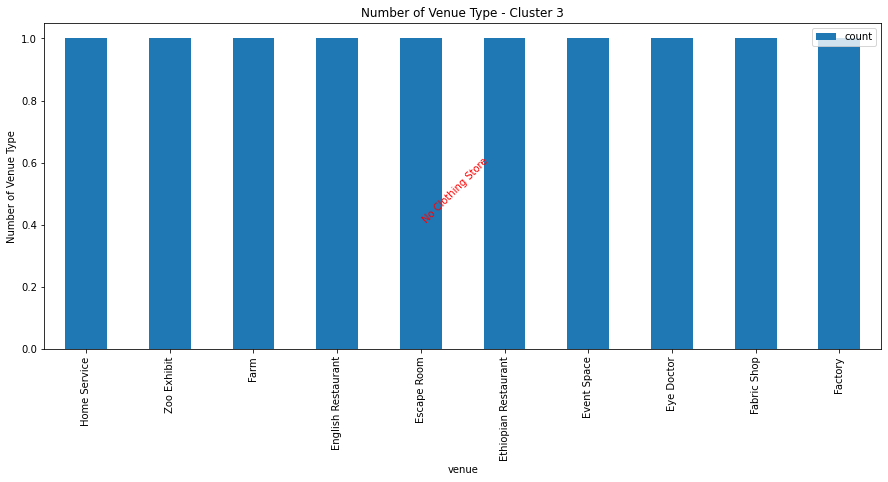

In [263]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cluster3_df.plot(kind ='bar', figsize = (15, 6))
plt.title('Number of Venue Type - Cluster 3')
plt.xlabel('venue')
plt.ylabel('Number of Venue Type')

#plt.annotate('',                    
 #            xy=(1, 0.8),            
#             xytext=(1, .7),        
#             xycoords='data',        
 #            arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('No Clothing Store', 
             xy=(4,0.4),                    
             rotation=45,                  
             va='bottom',                    
             ha='left',                    
            color = 'red')

plt.show()

#### Cluster 4

In [234]:
cluster4 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[0] + list(range(3, chicago_merged.shape[1]))]]

In [240]:
#Creating a dictionnary list from cluster 4

#initialize the list
cluster4_dict_list = []
for venue in columns:
    
    cluster4_dict = cluster4[venue].value_counts().to_dict()     #convert each data series into a dictionnary
    print(cluster4_dict)
    cluster4_dict_list.append(cluster4_dict)                    # merge dictionnries to create list
print('=====')
print(cluster4_dict_list)

{'Discount Store': 1}
{'Zoo Exhibit': 1}
{'Eastern European Restaurant': 1}
{'English Restaurant': 1}
{'Escape Room': 1}
{'Ethiopian Restaurant': 1}
{'Event Space': 1}
{'Eye Doctor': 1}
{'Fabric Shop': 1}
{'Factory': 1}
=====
[{'Discount Store': 1}, {'Zoo Exhibit': 1}, {'Eastern European Restaurant': 1}, {'English Restaurant': 1}, {'Escape Room': 1}, {'Ethiopian Restaurant': 1}, {'Event Space': 1}, {'Eye Doctor': 1}, {'Fabric Shop': 1}, {'Factory': 1}]


In [241]:
#Combining all the dictionnaries and summing up values of duplicates keys

import itertools
import collections

Cdict_4 = collections.defaultdict(int)

cluster4_dict_list_items = []
for i in range(10):
    cluster4_dict_list_items.append(cluster4_dict_list[i].items())
    
#print(cluster1_dict_list_items)


for k, v in itertools.chain(cluster4_dict_list_items[0], cluster4_dict_list_items[1], 
                            cluster4_dict_list_items[2], cluster4_dict_list_items[3], 
                            cluster4_dict_list_items[4], cluster4_dict_list_items[5], 
                            cluster4_dict_list_items[6], cluster4_dict_list_items[7], 
                            cluster4_dict_list_items[8], cluster4_dict_list_items[9]):          
    Cdict_4[k] += v

print(dict(Cdict_4))


{'Discount Store': 1, 'Zoo Exhibit': 1, 'Eastern European Restaurant': 1, 'English Restaurant': 1, 'Escape Room': 1, 'Ethiopian Restaurant': 1, 'Event Space': 1, 'Eye Doctor': 1, 'Fabric Shop': 1, 'Factory': 1}


In [242]:
#converting the Cdict dictionnary to a dataframe and generating a bar graph

cluster4_df = pd.DataFrame(list(Cdict_4.items()), columns =['venue', 'count'])

cluster4_df.sort_values(by=['count'], ascending=False, inplace=True)
#cluster4_df = cluster3_df[cluster4_df['count'] > 13]
cluster4_df.set_index("venue", drop=True, inplace=True)
cluster4_df

count
venue                             
Discount Store                   1
Zoo Exhibit                      1
Eastern European Restaurant      1
English Restaurant               1
Escape Room                      1
Ethiopian Restaurant             1
Event Space                      1
Eye Doctor                       1
Fabric Shop                      1
Factory                          1

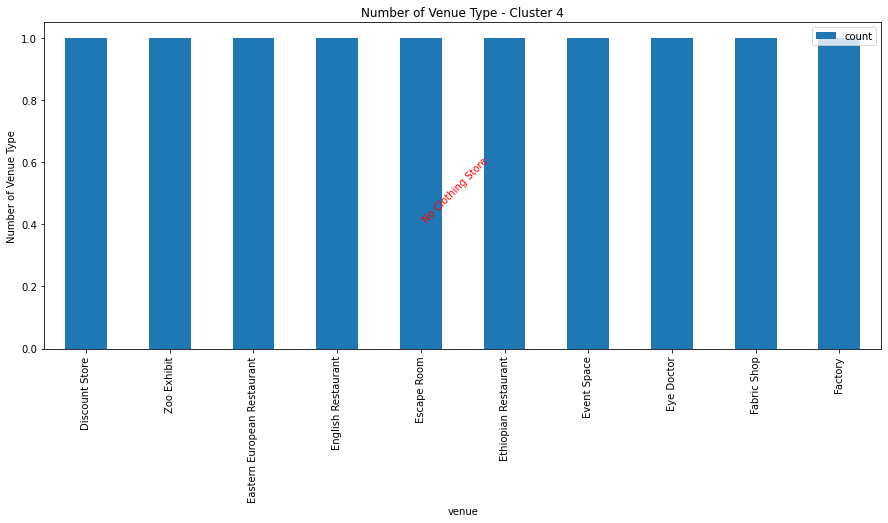

In [243]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cluster4_df.plot(kind ='bar', figsize = (15, 6))
plt.title('Number of Venue Type - Cluster 4')
plt.xlabel('venue')
plt.ylabel('Number of Venue Type')

#plt.annotate('',                    
 #            xy=(1, 0.8),            
#             xytext=(1, .7),        
#             xycoords='data',        
 #            arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('No Clothing Store', 
             xy=(4,0.4),                    
             rotation=45,                  
             va='bottom',                    
             ha='left',                    
            color = 'red')

plt.show()

In [303]:
cluster5 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[0] + list(range(3, chicago_merged.shape[1]))]]
cluster5[['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue']]
cluster5.set_index('Neighborhood', inplace=True)
cluster5

Cluster Labels 1st Most Common Venue  \
Neighborhood                                                                
Burnside                                          4          Intersection   
LeClaire Courts                                   4          Intersection   
Legends South (Robert Taylor Homes)               4          Intersection   
Sleepy Hollow                                     4          Intersection   

                                    2nd Most Common Venue  \
Neighborhood                                                
Burnside                                    Train Station   
LeClaire Courts                                   Airport   
Legends South (Robert Taylor Homes)               Airport   
Sleepy Hollow                                     Airport   

                                    3rd Most Common Venue  \
Neighborhood                                                
Burnside                                     Home Service   
LeClaire Courts                               Zoo Exhibit   
Legends South (Robert Taylor Homes)           Zoo Exhibit   
Sleepy Hollow                                       Hotel   

                                    4th Most Common Venue  \
Neighborhood                                                
Burnside                                      Bus Station   
LeClaire Courts                            Farmers Market   
Legends South (Robert Taylor Homes)        Farmers Market   
Sleepy Hollow                                 Zoo Exhibit   

                                    5th Most Common Venue  \
Neighborhood                                                
Burnside                                      Zoo Exhibit   
LeClaire Courts                               Escape Room   
Legends South (Robert Taylor Homes)           Escape Room   
Sleepy Hollow                                        Farm   

                                    6th Most Common Venue  \
Neighborhood                                                
Burnside                               Falafel Restaurant   
LeClaire Courts                      Ethiopian Restaurant   
Legends South (Robert Taylor Homes)  Ethiopian Restaurant   
Sleepy Hollow                          English Restaurant   

                                    7th Most Common Venue  \
Neighborhood                                                
Burnside                               English Restaurant   
LeClaire Courts                               Event Space   
Legends South (Robert Taylor Homes)           Event Space   
Sleepy Hollow                                 Escape Room   

                                    8th Most Common Venue  \
Neighborhood                                                
Burnside                                      Escape Room   
LeClaire Courts                                Eye Doctor   
Legends South (Robert Taylor Homes)            Eye Doctor   
Sleepy Hollow                        Ethiopian Restaurant   

                                    9th Most Common Venue  \
Neighborhood                                                
Burnside                             Ethiopian Restaurant   
LeClaire Courts                               Fabric Shop   
Legends South (Robert Taylor Homes)           Fabric Shop   
Sleepy Hollow                                 Event Space   

                                    10th Most Common Venue  
Neighborhood                                                
Burnside                                       Event Space  
LeClaire Courts                                    Factory  
Legends South (Robert Taylor Homes)                Factory  
Sleepy Hollow                                   Eye Doctor

In [245]:
#Creating a dictionnary list from cluster 5

#initialize the list
cluster5_dict_list = []
for venue in columns:
    
    cluster5_dict = cluster5[venue].value_counts().to_dict()     #convert each data series into a dictionnary
    print(cluster5_dict)
    cluster5_dict_list.append(cluster5_dict)                    # merge dictionnries to create list
print('=====')
print(cluster5_dict_list)

{'Intersection': 4}
{'Airport': 3, 'Train Station': 1}
{'Zoo Exhibit': 2, 'Hotel': 1, 'Home Service': 1}
{'Farmers Market': 2, 'Zoo Exhibit': 1, 'Bus Station': 1}
{'Escape Room': 2, 'Farm': 1, 'Zoo Exhibit': 1}
{'Ethiopian Restaurant': 2, 'English Restaurant': 1, 'Falafel Restaurant': 1}
{'Event Space': 2, 'Escape Room': 1, 'English Restaurant': 1}
{'Eye Doctor': 2, 'Escape Room': 1, 'Ethiopian Restaurant': 1}
{'Fabric Shop': 2, 'Ethiopian Restaurant': 1, 'Event Space': 1}
{'Factory': 2, 'Eye Doctor': 1, 'Event Space': 1}
=====
[{'Intersection': 4}, {'Airport': 3, 'Train Station': 1}, {'Zoo Exhibit': 2, 'Hotel': 1, 'Home Service': 1}, {'Farmers Market': 2, 'Zoo Exhibit': 1, 'Bus Station': 1}, {'Escape Room': 2, 'Farm': 1, 'Zoo Exhibit': 1}, {'Ethiopian Restaurant': 2, 'English Restaurant': 1, 'Falafel Restaurant': 1}, {'Event Space': 2, 'Escape Room': 1, 'English Restaurant': 1}, {'Eye Doctor': 2, 'Escape Room': 1, 'Ethiopian Restaurant': 1}, {'Fabric Shop': 2, 'Ethiopian Restaurant': 

In [246]:
#Combining all the dictionnaries and summing up values of duplicates keys

import itertools
import collections

Cdict_5 = collections.defaultdict(int)

cluster5_dict_list_items = []
for i in range(10):
    cluster5_dict_list_items.append(cluster5_dict_list[i].items())
    
#print(cluster1_dict_list_items)


for k, v in itertools.chain(cluster5_dict_list_items[0], cluster5_dict_list_items[1], 
                            cluster5_dict_list_items[2], cluster5_dict_list_items[3], 
                            cluster5_dict_list_items[4], cluster5_dict_list_items[5], 
                            cluster5_dict_list_items[6], cluster5_dict_list_items[7], 
                            cluster5_dict_list_items[8], cluster5_dict_list_items[9]):          
    Cdict_5[k] += v

print(dict(Cdict_5))


{'Intersection': 4, 'Airport': 3, 'Train Station': 1, 'Zoo Exhibit': 4, 'Hotel': 1, 'Home Service': 1, 'Farmers Market': 2, 'Bus Station': 1, 'Escape Room': 4, 'Farm': 1, 'Ethiopian Restaurant': 4, 'English Restaurant': 2, 'Falafel Restaurant': 1, 'Event Space': 4, 'Eye Doctor': 3, 'Fabric Shop': 2, 'Factory': 2}


In [304]:
#converting the Cdict dictionnary to a dataframe and generating a bar graph

cluster5_df = pd.DataFrame(list(Cdict_5.items()), columns =['venue', 'count'])
cluster5_df.sort_values(by=['count'], ascending=False, inplace=True)
cluster5_df.set_index("venue", drop=True, inplace=True)
cluster5_df

count
venue                      
Intersection              4
Ethiopian Restaurant      4
Event Space               4
Escape Room               4
Zoo Exhibit               4
Airport                   3
Eye Doctor                3
Farmers Market            2
English Restaurant        2
Fabric Shop               2
Factory                   2
Hotel                     1
Home Service              1
Bus Station               1
Farm                      1
Falafel Restaurant        1
Train Station             1

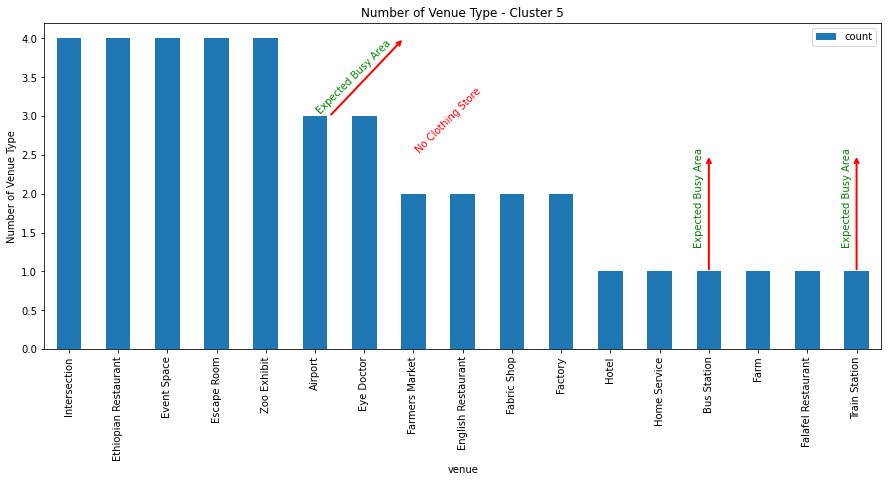

In [321]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cluster5_df.plot(kind ='bar', figsize = (15, 6))
plt.title('Number of Venue Type - Cluster 5')
plt.xlabel('venue')
plt.ylabel('Number of Venue Type')

plt.annotate('',                    
             xy=(13, 1),            
             xytext=(13, 2.5),        
             xycoords='data',        
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('',                    
             xy=(16, 1),            
             xytext=(16, 2.5),        
             xycoords='data',        
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('',                    
             xy=(5.3, 3),            
             xytext=(6.8, 4),        
             xycoords='data',        
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='red', lw=2))

plt.annotate('No Clothing Store', 
             xy=(7,2.5),                    
             rotation=45,                  
             va='bottom',                    
             ha='left',                    
            color = 'red')


plt.annotate('Expected Busy Area', 
             xy=(12.7,1.3),                    
             rotation=90,                  
             va='bottom',                    
             ha='left',                    
            color = 'green')

plt.annotate('Expected Busy Area', 
             xy=(15.7,1.3),                    
             rotation=90,                  
             va='bottom',                    
             ha='left',                    
            color = 'green')

plt.annotate('Expected Busy Area', 
             xy=(5,3),                    
             rotation=45,                  
             va='bottom',                    
             ha='left',                    
            color = 'green')
plt.show()

<a id='item4'></a>


<a id='item5'></a>
